# Customer Data analysis of an orgaization and conclude the most valueable customers and the customers who needs to be discounted in order to maximize the sales of the company

In [39]:
#Importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-dark')

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [12]:
# Importing the data
data=pd.read_csv(r"C:\Users\Rano's PC\Machine\data-science-projects\Customer-Analysis\ecommerce_customer_data_custom_ratios.csv")

In [13]:
# Checking the top 5 rows
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [14]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


There are 13 columns initially with 250000 maximum rows

In [15]:
# Removing the customer name columns as it holds personal information, and we have customer id column which is unique in nature
#There are duplicate age column for customers, so removing one of them
data.drop(columns=['Customer Name','Customer Age'],inplace=True)

In [16]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,0.0,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,0.0,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,0.0,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,0.0,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,0.0,49,Female,1


In [17]:
#Checking the Null values
(data.isnull().sum()/len(data))*100

Customer ID               0.0000
Purchase Date             0.0000
Product Category          0.0000
Product Price             0.0000
Quantity                  0.0000
Total Purchase Amount     0.0000
Payment Method            0.0000
Returns                  19.0384
Age                       0.0000
Gender                    0.0000
Churn                     0.0000
dtype: float64

There are 47596 null values, approx 19% of data

Checking the duplicate values

In [18]:
# Checking the duplicate values 
data.duplicated().sum()

np.int64(0)

there is no duplicate values

Checking the description of numerical columns

In [19]:
# Description of numerical columns
data.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,1.000000,70.000000,1.000000


Numerical columns seem to have normal values

In [20]:
# Number of unique values in categorical columns
data.select_dtypes(exclude='number').nunique()

Purchase Date       249736
Product Category         4
Payment Method           4
Gender                   2
dtype: int64

There is no single valued column

In [21]:
data['Product Category'].unique()

array(['Electronics', 'Home', 'Clothing', 'Books'], dtype=object)

In [22]:
data['Payment Method'].unique()

array(['Credit Card', 'PayPal', 'Cash', 'Crypto'], dtype=object)

### Basic cleaning of data

In [23]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,0.0,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,0.0,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,0.0,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,0.0,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,0.0,49,Female,1


In [24]:
# Ranaming the columns to lower case
data.columns=data.columns.str.lower()

In [25]:
# Changing customer id to string
data['customer id']=data['customer id'].astype('string')

In [26]:
# Separating the date values
data[['purchase date','purchase time']]=data['purchase date'].str.split(" ",expand=True)

In [27]:
# Changing the data type of purchase date
data['purchase date']=pd.to_datetime(data['purchase date'])

In [28]:
data['purchase time']=pd.to_datetime(data['purchase time']).dt.time

### Univariate Analysis

In [29]:
data['customer id'].value_counts()

customer id
39817    17
36437    17
47087    17
5252     15
35424    15
         ..
28708     1
22042     1
39409     1
5561      1
2028      1
Name: count, Length: 49673, dtype: Int64

In [30]:
data['customer id'].nunique()

49673

There are 49673 uniqe customers in this dataset

<Axes: xlabel='purchase date'>

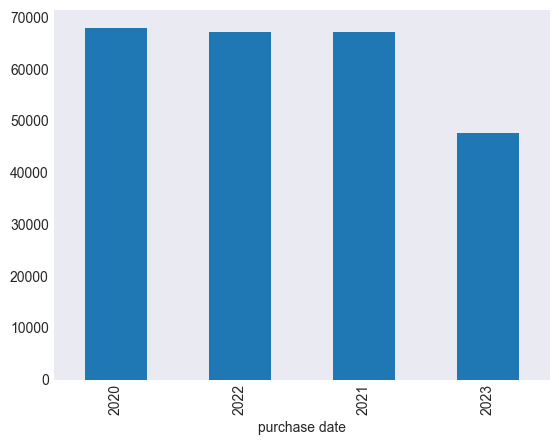

In [51]:
data['purchase date'].dt.year.value_counts().plot(kind='bar')

2023 year have less number of purchases

<Axes: xlabel='purchase date'>

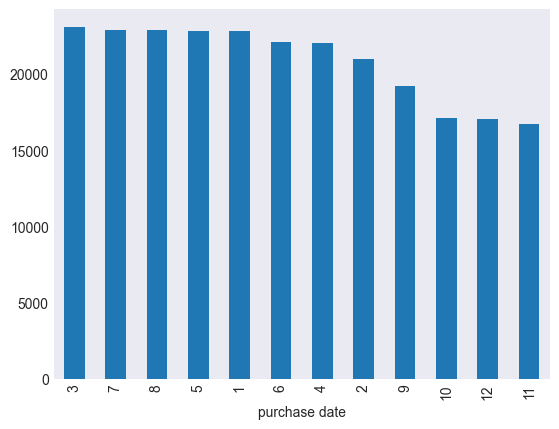

In [45]:
data['purchase date'].dt.month.value_counts().plot(kind='bar')

10,11,12 no months have less occurance

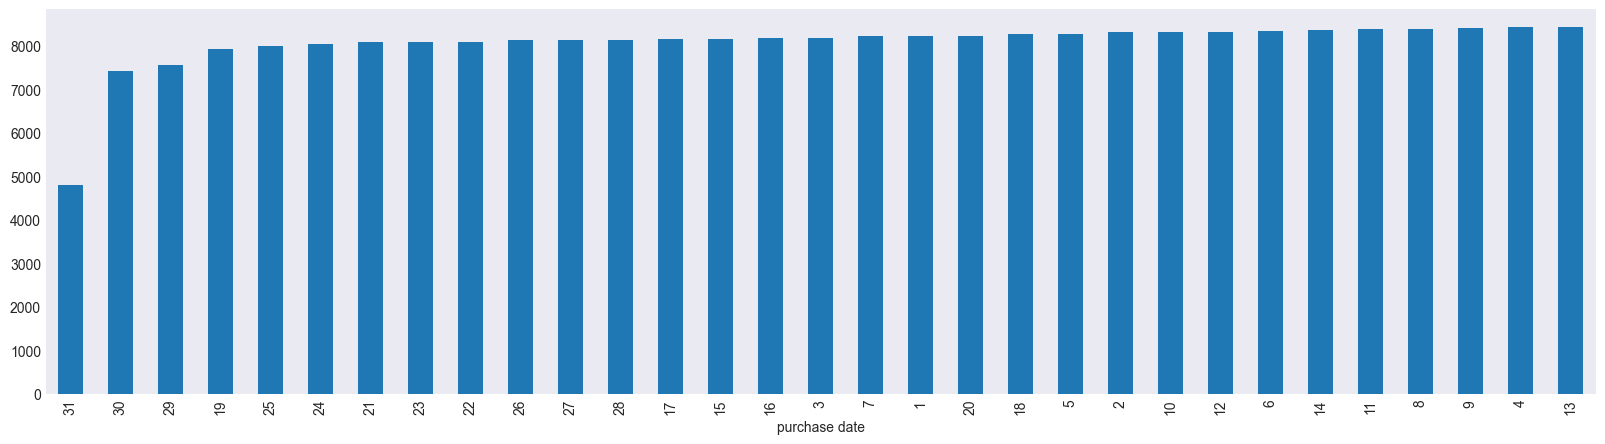

In [47]:
plt.figure(figsize=(20,5))
data['purchase date'].dt.day.value_counts().sort_values(ascending=True).plot(kind='bar')
plt.show()

31th have the least no of occurances

In [48]:
data['purchase date'].describe()

count                           250000
mean     2021-11-06 11:32:12.825599744
min                2020-01-01 00:00:00
25%                2020-12-02 00:00:00
50%                2021-11-06 00:00:00
75%                2022-10-11 00:00:00
max                2023-09-15 00:00:00
Name: purchase date, dtype: object

So becasue the data is upto 15th septemenber, there are lesser values in some dates

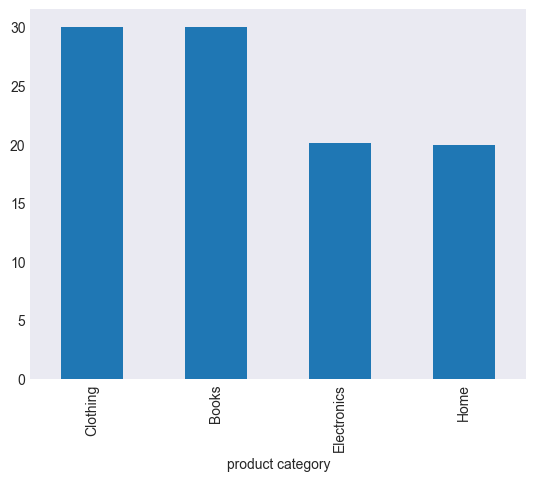

In [53]:
((data['product category'].value_counts(normalize=True)*100).round(2)).plot(kind='bar')
plt.show()

Clothing and books have most sales than electronics and home appliances

<Axes: xlabel='product price', ylabel='Density'>

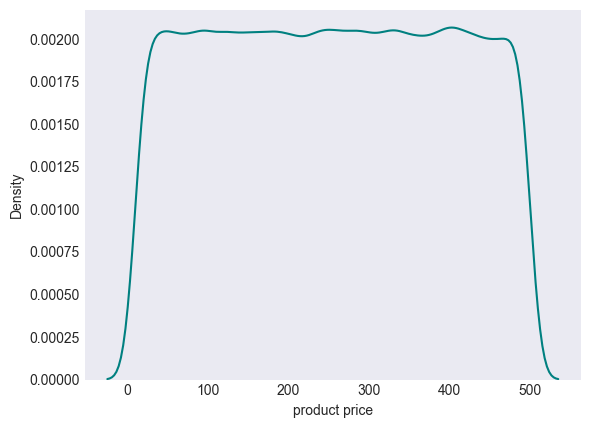

In [54]:
sns.kdeplot(data['product price'],color='teal')

All products of different prices are been sold uniformly

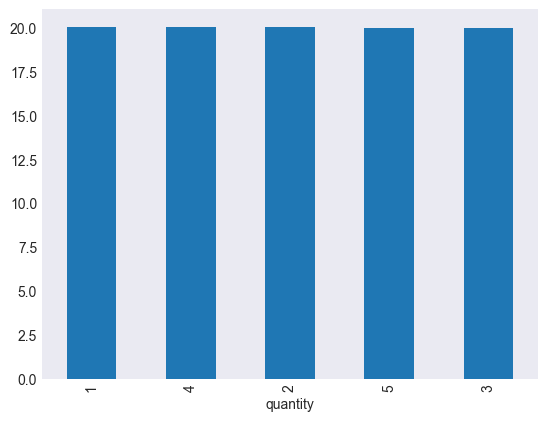

In [55]:
((data['quantity'].value_counts(normalize=True)*100)).round(2).plot(kind='bar')
plt.show()

Product quantity also holds uniform distribution

<Axes: xlabel='total purchase amount', ylabel='Density'>

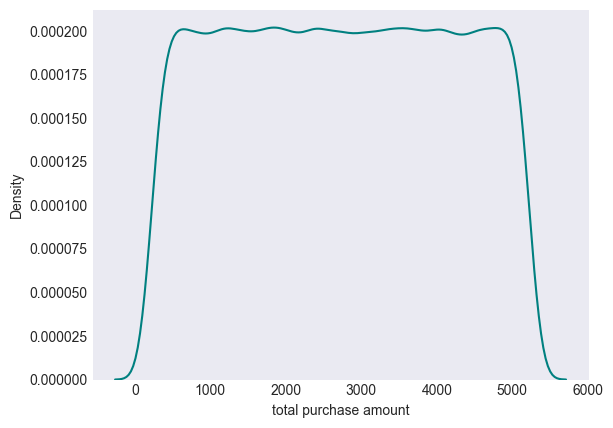

In [56]:
sns.kdeplot(data['total purchase amount'],color='teal')

Total spend follows a uniform distribution

<Axes: xlabel='payment method'>

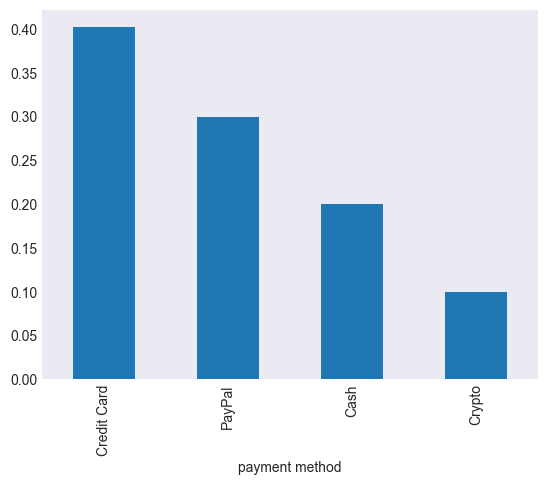

In [58]:
data['payment method'].value_counts(normalize=True).plot(kind='bar')

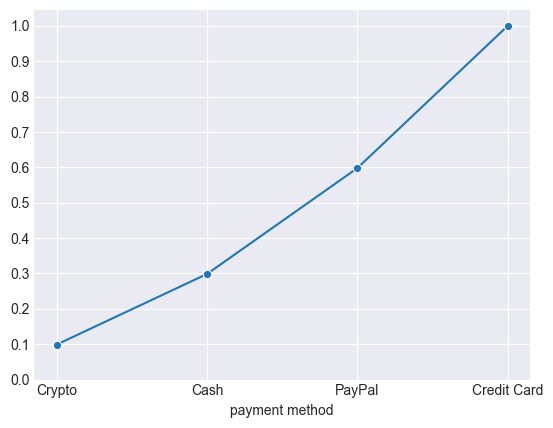

In [70]:
cumsum=np.cumsum(data['payment method'].value_counts(normalize=True).sort_values(ascending=True))
sns.lineplot(x=cumsum.index,y=cumsum.values,marker='o')
plt.yticks(np.linspace(0,1,11))
plt.grid(True)
plt.show()


70% of payments are done through paypal or credit card, most of the payments are done using credit card

<Axes: xlabel='age', ylabel='Density'>

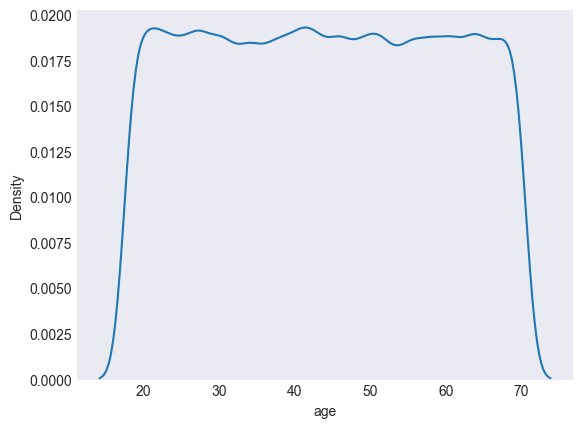

In [71]:
sns.kdeplot(data['age'])

<Axes: xlabel='age', ylabel='Count'>

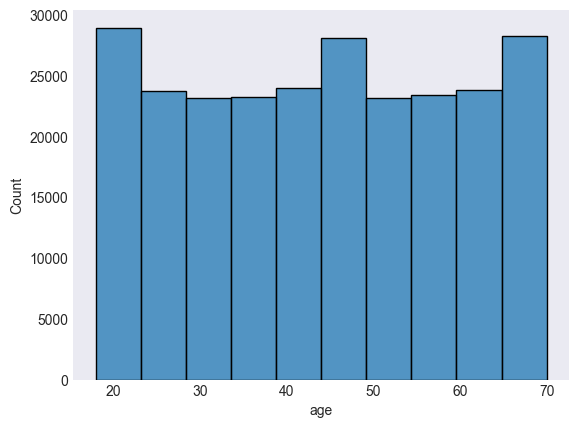

In [72]:
sns.histplot(data['age'],bins=10)